In [5]:
# Step 1 — Create Dataset
import pandas as pd

data = {
    "order_id": range(1, 31),
    "product_category": [
        "Electronics","Fashion","Home Appliances","Fashion","Electronics",
        "Electronics","Fashion","Home Appliances","Electronics","Home Appliances",
        "Fashion","Electronics","Home Appliances","Fashion","Electronics",
        "Home Appliances","Fashion","Electronics","Fashion","Home Appliances",
        "Electronics","Fashion","Home Appliances","Electronics","Fashion",
        "Electronics","Home Appliances","Fashion","Electronics","Home Appliances"
    ],
    "quantity": [1,2,1,3,1,2,1,2,1,1,3,1,2,1,2,1,2,1,3,1,2,1,1,3,1,2,1,2,1,1],
    "price": [1200,800,3000,700,1500,1800,1200,2500,2000,2800,
              900,2200,2500,850,1900,2600,750,2100,1000,2700,
              1600,950,2400,1400,1000,2300,2600,900,1750,2900],
    "purchase_date": [
        "2025-11-01","2025-11-01","2025-11-02","2025-11-02","2025-11-03",
        "2025-11-03","2025-11-04","2025-11-04","2025-11-05","2025-11-05",
        "2025-11-06","2025-11-06","2025-11-07","2025-11-07","2025-11-08",
        "2025-11-08","2025-11-09","2025-11-09","2025-11-10","2025-11-10",
        "2025-11-11","2025-11-11","2025-11-12","2025-11-12","2025-11-13",
        "2025-11-13","2025-11-14","2025-11-14","2025-11-15","2025-11-15"
    ],
    "customer_feedback": [
        "Great quality and fast delivery","Size was too small","Works well but noisy",
        "Color was different than expected","Very happy with the phone",
        "Good performance but battery drains fast","Loved the design",
        "Late delivery and expensive","Amazing display and speed","Helpful product",
        "Perfect fitting and good price","Delivery was late","Very useful in kitchen",
        "Material was not good","High performance laptop","Packaging was damaged",
        "Stylish look and affordable","Recommended by friend and good experience",
        "Comfortable but little pricey","Not worth the price",
        "Value for money!","Product quality average","Super easy to use",
        "Received wrong item","Very comfortable","Camera is not good",
        "Energy efficient and helpful","Color faded after wash",
        "Very smooth performance","Product stopped working after 2 days"
    ]
}

df = pd.DataFrame(data)
df.head()


,order_id,product_category,quantity,price,purchase_date,customer_feedback
0,1,Electronics,1,1200,2025-11-01,Great quality and fast delivery
1,2,Fashion,2,800,2025-11-01,Size was too small
2,3,Home Appliances,1,3000,2025-11-02,Works well but noisy
3,4,Fashion,3,700,2025-11-02,Color was different than expected
4,5,Electronics,1,1500,2025-11-03,Very happy with the phone


In [6]:
# Step 2 — Store the data into SQL & Run Queries
import sqlite3

# Create a connection
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Store dataframe into SQL table
df.to_sql("sales", conn, if_exists="replace", index=False)

print("Data inserted into SQL successfully!")


Data inserted into SQL successfully!


In [7]:
# 2.2 — Run SQL Queries- Query 1️⃣ — Total Revenue
query1 = """
SELECT SUM(quantity * price) AS total_revenue
FROM sales;
"""
pd.read_sql_query(query1, conn)


,total_revenue
0,75850


In [8]:
#Query 2️⃣ — Revenue by Category
query2 = """
SELECT product_category,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product_category
ORDER BY revenue DESC;
"""
pd.read_sql_query(query2, conn)


,product_category,revenue
0,Electronics,30150
1,Home Appliances,29000
2,Fashion,16700


In [9]:
#Query 3️⃣ — Total Orders by Category
query3 = """
SELECT product_category,
       COUNT(order_id) AS total_orders
FROM sales
GROUP BY product_category;
"""
pd.read_sql_query(query3, conn)


,product_category,total_orders
0,Electronics,11
1,Fashion,10
2,Home Appliances,9


In [10]:
# Query 4️⃣ — Average Price by Category
query4 = """
SELECT product_category,
       AVG(price) AS avg_price
FROM sales
GROUP BY product_category;
"""
pd.read_sql_query(query4, conn)


,product_category,avg_price
0,Electronics,1795.454545
1,Fashion,905.000000
2,Home Appliances,2666.666667


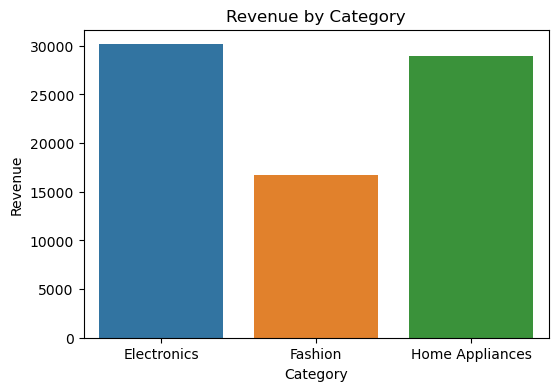

In [11]:
# Step 3 — Python Data Visualization
#Visualization 1 — Revenue by Category
import matplotlib.pyplot as plt
import seaborn as sns

revenue_data = pd.read_sql_query("""
SELECT product_category,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product_category;
""", conn)

plt.figure(figsize=(6,4))
sns.barplot(data=revenue_data, x="product_category", y="revenue")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()


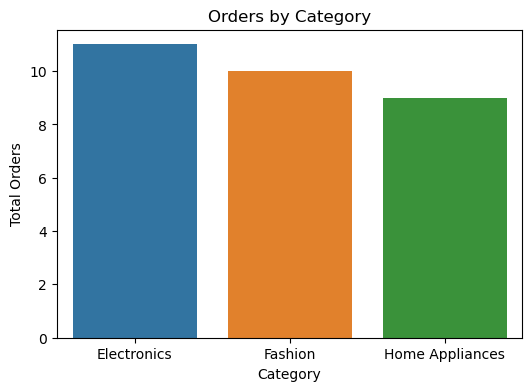

In [12]:
#Visualization 2 — Number of Orders by Category
orders_data = pd.read_sql_query("""
SELECT product_category,
       COUNT(order_id) AS orders
FROM sales
GROUP BY product_category;
""", conn)

plt.figure(figsize=(6,4))
sns.barplot(data=orders_data, x="product_category", y="orders")
plt.title("Orders by Category")
plt.xlabel("Category")
plt.ylabel("Total Orders")
plt.show()


In [15]:
# Step 4 — AI Insights (Alternative Free LLM)
!pip install transformers torch


In [16]:
# 4.1 — Sentiment Analysis of Customer Feedback
from transformers import pipeline

sentiment_model = pipeline("sentiment-analysis")

df["sentiment"] = df["customer_feedback"].apply(lambda x: sentiment_model(x)[0]["label"])
df.head()


C:\Users\Admin\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\Admin\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


,order_id,product_category,quantity,price,purchase_date,customer_feedback,sentiment
0,1,Electronics,1,1200,2025-11-01,Great quality and fast delivery,POSITIVE
1,2,Fashion,2,800,2025-11-01,Size was too small,NEGATIVE
2,3,Home Appliances,1,3000,2025-11-02,Works well but noisy,NEGATIVE
3,4,Fashion,3,700,2025-11-02,Color was different than expected,POSITIVE
4,5,Electronics,1,1500,2025-11-03,Very happy with the phone,POSITIVE


In [17]:
#4.2 — Calculate Sentiment Summary
sent_summary = df["sentiment"].value_counts()
sent_summary


sentiment
POSITIVE    18
NEGATIVE    12
Name: count, dtype: int64

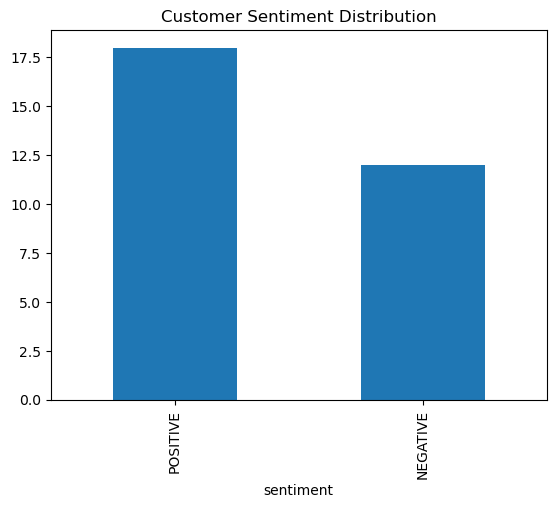

In [18]:
#4.3 — Visualize Sentiment
sent_summary.plot(kind="bar", title="Customer Sentiment Distribution")
plt.show()


In [19]:
#4.4 — AI-Generated Insights Using Sentiment + Revenue Data
total_rev = revenue_data["revenue"].sum()
best_cat = revenue_data.loc[revenue_data["revenue"].idxmax(), "product_category"]
worst_sent_cat = df[df["sentiment"]=="NEGATIVE"]["product_category"].mode()[0]

auto_insights = f"""
 AI Insights Report

• Total Revenue: {total_rev}
• Best Revenue Category: {best_cat}
• Most Customer Complaints: {worst_sent_cat}

Recommendation:
Focus on improving product quality and delivery service in {worst_sent_cat} category.
Electronics continues to drive major revenue.

Summary:
AI suggests focusing on customer satisfaction to boost repeat sales.
"""
print(auto_insights)



 AI Insights Report

• Total Revenue: 75850
• Best Revenue Category: Electronics
• Most Customer Complaints: Home Appliances

Recommendation:
Focus on improving product quality and delivery service in Home Appliances category.
Electronics continues to drive major revenue.

Summary:
AI suggests focusing on customer satisfaction to boost repeat sales.



In [20]:
# Step 5 — AI Natural Language Query System
# 5.1 Define a Function for NLQ (Natural Language Query)
def ai_query(question):
    
    # Identify intent using simple logic + keywords
    question_lower = question.lower()

    if "revenue" in question_lower:
        sql = """
        SELECT product_category, SUM(quantity * price) AS revenue
        FROM sales
        GROUP BY product_category
        ORDER BY revenue DESC;
        """
        result = pd.read_sql_query(sql, conn)
        
        top_cat = result.iloc[0]["product_category"]
        top_rev = result.iloc[0]["revenue"]
        
        return f"""
🤖 AI Analyst Response:

📌 Business Insight:
The **{top_cat}** category generates the highest revenue of **₹{top_rev}**.

💡 Strategy Suggestion:
Increase marketing focus and add more premium products in this category
to maximize revenue opportunities.

✨ Summary:
{top_cat} = high demand + strong revenue.
        """
    
    elif "orders" in question_lower or "sales" in question_lower:
        sql = """
        SELECT product_category, COUNT(order_id) AS order_count
        FROM sales
        GROUP BY product_category
        ORDER BY order_count DESC;
        """
        result = pd.read_sql_query(sql, conn)
        
        top_cat = result.iloc[0]["product_category"]
        top_orders = result.iloc[0]["order_count"]
        
        return f"""
🤖 AI Analyst Response:

📌 Insight:
**{top_cat}** category has the highest number of orders: **{top_orders}**.

🛍️ Customer Pattern:
High purchase count means strong customer interest and accessibility.

✨ Strategy:
Focus retention and loyalty programs for **{top_cat}** buyers.
        """
    
    else:
        return "I can currently answer questions about revenue and orders only."


In [21]:
# 5.2 Ask Questions to Your AI
print(ai_query("Which category earns the most revenue?"))



🤖 AI Analyst Response:

📌 Business Insight:
The **Electronics** category generates the highest revenue of **₹30150**.

💡 Strategy Suggestion:
Increase marketing focus and add more premium products in this category
to maximize revenue opportunities.

✨ Summary:
Electronics = high demand + strong revenue.
        


In [22]:
print(ai_query("Which category has most orders?"))



🤖 AI Analyst Response:

📌 Insight:
**Electronics** category has the highest number of orders: **11**.

🛍️ Customer Pattern:
High purchase count means strong customer interest and accessibility.

✨ Strategy:
Focus retention and loyalty programs for **Electronics** buyers.
        
